In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["xtick.minor.visible"] = True 
plt.rcParams["ytick.minor.visible"] = True 

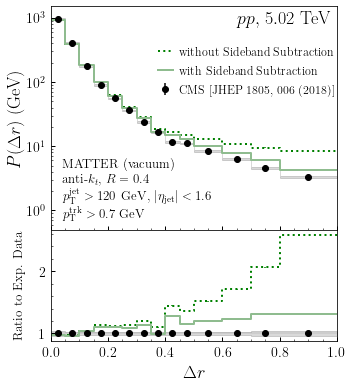

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(5, 5.5), sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0,'height_ratios': (5,2.5)})
ax1, ax2  = axs

for ax in axs.flat:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\Delta r$', fontsize=18, labelpad=6)
    ax.set_xticks([0.2,0.4,0.6,0.8, 1.0])
    ax.tick_params(width = 1, length = 4, pad=5)
    ax.label_outer()

ax2.axhline(1, color = "black", linewidth=0.2, alpha=0.5)

ax2.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])
ax1.set_xlim(0,1.0)
ax2.set_xlim(0,1.0)

ax1.set_ylim(0.5,1500)
ax1.set_ylabel(r'$P(\Delta r)$ (GeV)', fontsize=18, labelpad=2)
ax2.set_ylabel(r'Ratio to Exp. Data', fontsize=13, labelpad=14)


ax1.set_yscale("log")

ax1.text(0.975, 800, r'$pp,\,5.02$ TeV', fontsize = 18, ha = 'right')
# ax2.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')
# ax3.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')

##########################################################################################################

file1 = '../SubStrData/JetShapeCMS5TeV/5020_PP/jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt0.7-300.0_rap0.0-2.4.txt'
#file2 = '../SubStrData/JetShapeCMS5TeV/5020_PP_MPI_OFF/jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt0.7-300.0_rap0.0-2.4.txt'
file2 ='../SubStrData/JetShapeSubCMS5TeV/5020_PP/jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt0.7-300.0_rap0.0-4.5.txt'
filed = '/Users/yasukitachibana/GoogleDrive/Codes/AAPaperJetAnalysis/exp_data/cms_5tev_jet_shape/jet_shape_pp.txt'

data1 = np.loadtxt(file1, comments='#')
data2 = np.loadtxt(file2, comments='#')
datad = np.loadtxt(filed, comments='#')

x1 = data1[:,1]
y1 = data1[:,3]
y1err = data1[:,4]
x1step = np.append(data1[:,0],data1[-1,2])
y1step = np.append(data1[:,3],data1[-1,3])

x2 = data2[:,1]
y2 = data2[:,3]
y2err = data2[:,4]
x2step = np.append(data2[:,0],data2[-1,2])
y2step = np.append(data2[:,3],data2[-1,3])



xd = datad[:,0]
yd = datad[:,3]
yderr = datad[:,4]
xdstep = np.append(datad[:,1],datad[-1,2])
ydstep = np.append(datad[:,3],datad[-1,3])


ydsysp = np.append(datad[:,6],datad[-1,6])
ydsysm = np.append(datad[:,7],datad[-1,7])



ax1.step(x1step, y1step, where='post', label='without Sideband Subtraction', color='green',linestyle='dotted', linewidth = 2)
ax1.errorbar(x1, y1, yerr=y1err, marker="", linestyle="none", color='green')

ax1.step(x2step, y2step, where='post', label='with Sideband Subtraction', color='darkseagreen',linestyle='solid', linewidth = 2)
ax1.errorbar(x2, y2, yerr=y1err, marker="", linestyle="none", color='darkseagreen')



ax1.errorbar(xd, yd, yerr=yderr, marker="o", linestyle="none", color = 'black',label='CMS [JHEP 1805, 006 (2018)]')
ax1.fill_between(xdstep, ydstep+ydsysm, ydstep+ydsysp, step='post', color='k', alpha=0.15)
#######
ax2.step(x1step, y1step/ydstep, where='post', color='green',linestyle='dotted', linewidth = 2)
ax2.errorbar(x1, y1/yd, yerr=y1err/yd, marker="", linestyle="none", color='green')

ax2.step(x2step, y2step/ydstep, where='post', color='darkseagreen',linestyle='solid', linewidth = 2)
ax2.errorbar(x2, y2/yd, yerr=y2err/yd, marker="", linestyle="none", color='darkseagreen')




ax2.errorbar(xd, yd/yd, yerr=yderr/yd, marker="o", linestyle="none", color = 'black')
ax2.fill_between(xdstep, (ydstep+ydsysm)/ydstep, (ydstep+ydsysp)/ydstep, step='post', color='k', alpha=0.15)
##########################################################################################################
    

ax1.text(0.04, 0.8, r'MATTER (vacuum)'+'\n'+r'anti-$k_t$, $R=0.4$'+'\n'+r'$p_{\mathrm{T}}^{\mathrm{jet}}>120$ GeV, $|\eta_{\mathrm {jet}}|<1.6$'+'\n'+r'$p_{\mathrm{T}}^{\mathrm{trk}}>0.7$ GeV', fontsize = 13, ha = 'left')
# ax2.text(0.04, 3.25, r'$Q_{\mathrm{switch}}=2$ GeV'+'\n'+r'$T_{\mathrm{c}}=0.16$ GeV', fontsize = 14, ha = 'left')


ax1.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')
# ax2.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')
# ax3.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')

plt.tight_layout()
plt.savefig("sideband_jetshape.pdf")

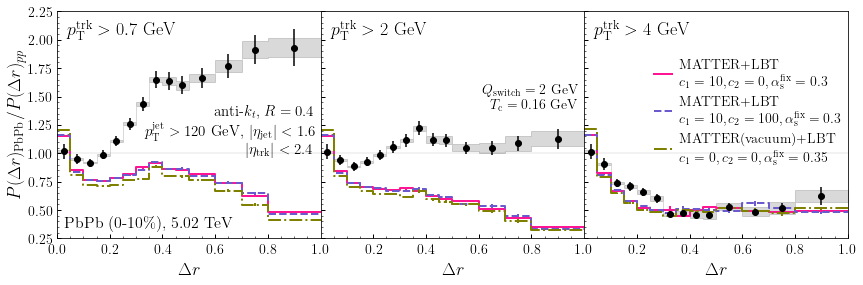

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
(ax1, ax2, ax3)  = axs

for ax in axs.flat:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\Delta r$', fontsize=18, labelpad=6)
    ax.set_xticks([0.2,0.4,0.6,0.8, 1.0])
    ax.tick_params(width = 1, length = 4, pad=5)
    ax.label_outer()
    ax.axhline(1, color = "black", linewidth=0.2, alpha=0.5)

ax1.text(0.035, 2.05, r'$p_{\mathrm{T}}^{\mathrm{trk}}>0.7$ GeV', fontsize = 18, ha = 'left')
ax2.text(0.035, 2.05, r'$p_{\mathrm{T}}^{\mathrm{trk}}>2$ GeV', fontsize = 18, ha = 'left')
ax3.text(0.035, 2.05, r'$p_{\mathrm{T}}^{\mathrm{trk}}>4$ GeV', fontsize = 18, ha = 'left')

ax1.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])
ax1.set_xlim(0,1.0)
ax2.set_xlim(0,1.0)
ax3.set_xlim(0,1.0)
ax1.set_ylim(0.25,2.25)
ax1.set_ylabel(r'$P(\Delta r)_{\mathrm{PbPb}}/P(\Delta r)_{pp}$', fontsize=18, labelpad=2)
ax4.set_ylabel(r'Ratio to Exp. Data', fontsize=13, labelpad=14)



ax1.text(0.025, 0.35, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 16, ha = 'left')

file1 = '../SubStrData/JetShapeCMS5TeV/Type5_qhatA10_B0_0p30_Q2p0/OutputFile/raa_jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt0.7-300.0_rap0.0-2.4.txt'
file2 = '../SubStrData/JetShapeCMS5TeV/Type5_qhatA10_B100_0p30_Q2p0/OutputFile/raa_jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt0.7-300.0_rap0.0-2.4.txt'
file3 = '../SubStrData/JetShapeCMS5TeV/RunningAlphas_MATTER_Vacuum_LBT/5020_PbPb_0-10_0.35_2.0_1/raa_jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt0.7-300.0_rap0.0-2.4.txt'

filed = '/Users/yasukitachibana/GoogleDrive/Codes/AAPaperJetAnalysis/exp_data/cms_5tev_jet_shape/raa_jet_shape_0-10_0R7.txt'


data1 = np.loadtxt(file1, comments='#')
data2 = np.loadtxt(file2, comments='#')
data3 = np.loadtxt(file3, comments='#')
datad = np.loadtxt(filed, comments='#')

x1 = data1[:,1]
y1 = data1[:,3]
y1err = data1[:,4]
x1step = np.append(data1[:,0],data1[-1,2])
y1step = np.append(data1[:,3],data1[-1,3])

x2 = data2[:,1]
y2 = data2[:,3]
y2err = data2[:,4]
x2step = np.append(data2[:,0],data2[-1,2])
y2step = np.append(data2[:,3],data2[-1,3])

x3 = data3[:,1]
y3 = data3[:,3]
y3err = data2[:,4]
x3step = np.append(data3[:,0],data3[-1,2])
y3step = np.append(data3[:,3],data3[-1,3])

xd = datad[:,0]
yd = datad[:,3]
yderr = datad[:,4]
xdstep = np.append(datad[:,1],datad[-1,2])
ydstep = np.append(datad[:,3],datad[-1,3])

ydsysp = np.append(datad[:,6],datad[-1,6])
ydsysm = np.append(datad[:,7],datad[-1,7])



ax1.errorbar(xd, yd, yerr=yderr, marker="o", linestyle="none", color = 'black')
ax1.fill_between(xdstep, ydstep+ydsysm, ydstep+ydsysp, step='post', color='black', alpha=0.15)

ax1.step(x1step, y1step, where='post', label='MATTER+LBT'+'\n'+r'$c_1=10,c_2=0,\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.3$', color='deeppink',linewidth = 2)
ax1.errorbar(x1, y1, yerr=y1err, marker="", linestyle="none", color='deeppink',linewidth = 2)

ax1.step(x2step, y2step, where='post', label='MATTER+LBT'+'\n'+r'$c_1=10,c_2=100,\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.3$', linestyle='dashed', color='slateblue',linewidth = 2)
ax1.errorbar(x2, y2, yerr=y2err, marker="", linestyle="none", color='slateblue',linewidth = 2)

ax1.step(x3step, y3step, where='post', label='MATTER(vacuum)+LBT'+'\n'+r'$c_1=0,c_2=0,\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.35$', linestyle='dashdot', color='olive',linewidth = 2)
ax1.errorbar(x3, y3, yerr=y3err, marker="", linestyle="none", color='olive',linewidth = 2)
#########################################################################################
file1 = '../SubStrData/JetShapeCMS5TeV/Type5_qhatA10_B0_0p30_Q2p0/OutputFile/raa_jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt2.0-300.0_rap0.0-2.4.txt'
file2 = '../SubStrData/JetShapeCMS5TeV/Type5_qhatA10_B100_0p30_Q2p0/OutputFile/raa_jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt2.0-300.0_rap0.0-2.4.txt'
file3 = '../SubStrData/JetShapeCMS5TeV/RunningAlphas_MATTER_Vacuum_LBT/5020_PbPb_0-10_0.35_2.0_1/raa_jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt2.0-300.0_rap0.0-2.4.txt'

filed = '/Users/yasukitachibana/GoogleDrive/Codes/AAPaperJetAnalysis/exp_data/cms_5tev_jet_shape/raa_jet_shape_0-10_2R0.txt'


data1 = np.loadtxt(file1, comments='#')
data2 = np.loadtxt(file2, comments='#')
data3 = np.loadtxt(file3, comments='#')
datad = np.loadtxt(filed, comments='#')

x1 = data1[:,1]
y1 = data1[:,3]
y1err = data1[:,4]
x1step = np.append(data1[:,0],data1[-1,2])
y1step = np.append(data1[:,3],data1[-1,3])

x2 = data2[:,1]
y2 = data2[:,3]
y2err = data2[:,4]
x2step = np.append(data2[:,0],data2[-1,2])
y2step = np.append(data2[:,3],data2[-1,3])

x3 = data3[:,1]
y3 = data3[:,3]
y3err = data2[:,4]
x3step = np.append(data3[:,0],data3[-1,2])
y3step = np.append(data3[:,3],data3[-1,3])

xd = datad[:,0]
yd = datad[:,3]
yderr = datad[:,4]
xdstep = np.append(datad[:,1],datad[-1,2])
ydstep = np.append(datad[:,3],datad[-1,3])

ydsysp = np.append(datad[:,6],datad[-1,6])
ydsysm = np.append(datad[:,7],datad[-1,7])



ax2.errorbar(xd, yd, yerr=yderr, marker="o", linestyle="none", color = 'black')
ax2.fill_between(xdstep, ydstep+ydsysm, ydstep+ydsysp, step='post', color='black', alpha=0.15)

ax2.step(x1step, y1step, where='post', label='MATTER+LBT'+'\n'+r'$c_1=10,c_2=0,\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.3$', color='deeppink',linewidth = 2)
ax2.errorbar(x1, y1, yerr=y1err, marker="", linestyle="none", color='deeppink',linewidth = 2)

ax2.step(x2step, y2step, where='post', label='MATTER+LBT'+'\n'+r'$c_1=10,c_2=100,\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.3$', linestyle='dashed', color='slateblue',linewidth = 2)
ax2.errorbar(x2, y2, yerr=y2err, marker="", linestyle="none", color='slateblue',linewidth = 2)

ax2.step(x3step, y3step, where='post', label='MATTER(vacuum)+LBT'+'\n'+r'$c_1=0,c_2=0,\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.35$', linestyle='dashdot', color='olive',linewidth = 2)
ax2.errorbar(x3, y3, yerr=y3err, marker="", linestyle="none", color='olive',linewidth = 2)
#########################################################################################
file1 = '../SubStrData/JetShapeCMS5TeV/Type5_qhatA10_B0_0p30_Q2p0/OutputFile/raa_jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt4.0-300.0_rap0.0-2.4.txt'
file2 = '../SubStrData/JetShapeCMS5TeV/Type5_qhatA10_B100_0p30_Q2p0/OutputFile/raa_jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt4.0-300.0_rap0.0-2.4.txt'
file3 = '../SubStrData/JetShapeCMS5TeV/RunningAlphas_MATTER_Vacuum_LBT/5020_PbPb_0-10_0.35_2.0_1/raa_jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt4.0-300.0_rap0.0-2.4.txt'

filed = '/Users/yasukitachibana/GoogleDrive/Codes/AAPaperJetAnalysis/exp_data/cms_5tev_jet_shape/raa_jet_shape_0-10_4R0.txt'


data1 = np.loadtxt(file1, comments='#')
data2 = np.loadtxt(file2, comments='#')
data3 = np.loadtxt(file3, comments='#')
datad = np.loadtxt(filed, comments='#')

x1 = data1[:,1]
y1 = data1[:,3]
y1err = data1[:,4]
x1step = np.append(data1[:,0],data1[-1,2])
y1step = np.append(data1[:,3],data1[-1,3])

x2 = data2[:,1]
y2 = data2[:,3]
y2err = data2[:,4]
x2step = np.append(data2[:,0],data2[-1,2])
y2step = np.append(data2[:,3],data2[-1,3])

x3 = data3[:,1]
y3 = data3[:,3]
y3err = data2[:,4]
x3step = np.append(data3[:,0],data3[-1,2])
y3step = np.append(data3[:,3],data3[-1,3])

xd = datad[:,0]
yd = datad[:,3]
yderr = datad[:,4]
xdstep = np.append(datad[:,1],datad[-1,2])
ydstep = np.append(datad[:,3],datad[-1,3])

ydsysp = np.append(datad[:,6],datad[-1,6])
ydsysm = np.append(datad[:,7],datad[-1,7])



ax3.errorbar(xd, yd, yerr=yderr, marker="o", linestyle="none", color = 'black')
ax3.fill_between(xdstep, ydstep+ydsysm, ydstep+ydsysp, step='post', color='black', alpha=0.15)

ax3.step(x1step, y1step, where='post', label='MATTER+LBT'+'\n'+r'$c_1=10,c_2=0,\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.3$', color='deeppink',linewidth = 2)
ax3.errorbar(x1, y1, yerr=y1err, marker="", linestyle="none", color='deeppink',linewidth = 2)

ax3.step(x2step, y2step, where='post', label='MATTER+LBT'+'\n'+r'$c_1=10,c_2=100,\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.3$', linestyle='dashed', color='slateblue',linewidth = 2)
ax3.errorbar(x2, y2, yerr=y2err, marker="", linestyle="none", color='slateblue',linewidth = 2)

ax3.step(x3step, y3step, where='post', label='MATTER(vacuum)+LBT'+'\n'+r'$c_1=0,c_2=0,\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.35$', linestyle='dashdot', color='olive',linewidth = 2)
ax3.errorbar(x3, y3, yerr=y3err, marker="", linestyle="none", color='olive',linewidth = 2)

ax1.text(0.975, 1.0, r'anti-$k_t$, $R=0.4$'+'\n'+r'$p_{\mathrm{T}}^{\mathrm{jet}}>120$ GeV, $|\eta_{\mathrm {jet}}|<1.6$'+'\n'+r'$|\eta_{\mathrm {trk}}|<2.4$', fontsize = 15, ha = 'right')
ax2.text(0.975, 1.4, r'$Q_{\mathrm{switch}}=2$ GeV'+'\n'+r'$T_{\mathrm{c}}=0.16$ GeV', fontsize = 14, ha = 'right')



ax3.legend(bbox_to_anchor=(1.05, 0.88), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=14,edgecolor='none', frameon=True, facecolor='none')




plt.tight_layout()
plt.savefig("new_jetshape_raa_c.pdf")

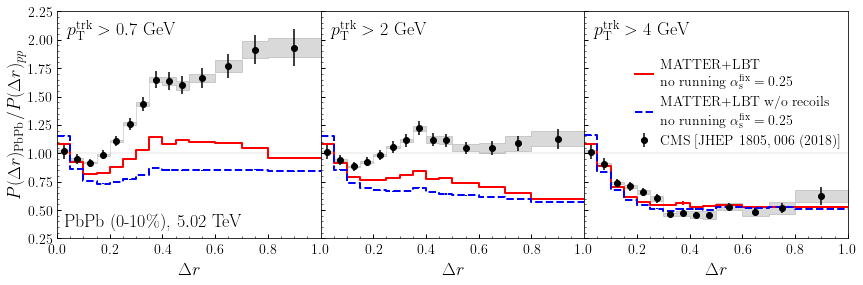

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
(ax1, ax2, ax3)  = axs

for ax in axs.flat:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\Delta r$', fontsize=18, labelpad=6)
    ax.set_xticks([0.2,0.4,0.6,0.8, 1.0])
    ax.tick_params(width = 1, length = 4, pad=5)
    ax.label_outer()
    ax.axhline(1, color = "black", linewidth=0.2, alpha=0.5)

ax1.text(0.035, 2.05, r'$p_{\mathrm{T}}^{\mathrm{trk}}>0.7$ GeV', fontsize = 18, ha = 'left')
ax2.text(0.035, 2.05, r'$p_{\mathrm{T}}^{\mathrm{trk}}>2$ GeV', fontsize = 18, ha = 'left')
ax3.text(0.035, 2.05, r'$p_{\mathrm{T}}^{\mathrm{trk}}>4$ GeV', fontsize = 18, ha = 'left')

ax1.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])
ax1.set_xlim(0,1.0)
ax2.set_xlim(0,1.0)
ax3.set_xlim(0,1.0)
ax1.set_ylim(0.25,2.25)
ax1.set_ylabel(r'$P(\Delta r)_{\mathrm{PbPb}}/P(\Delta r)_{pp}$', fontsize=18, labelpad=2)
ax4.set_ylabel(r'Ratio to Exp. Data', fontsize=13, labelpad=14)



ax1.text(0.025, 0.35, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'left')



######################################################################
######################################################################

file1 = '../SubStrData/JetShapeCMS5TeV/Tc_160_160/5020_PbPb_0-10_0R25_2R0_1/raa_jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt0.7-300.0_rap0.0-2.4.txt'
file2 = '../SubStrData/JetShapeCMS5TeV/Tc_160_160/5020_PbPb_0-10_0R25_2R0_0/raa_jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt0.7-300.0_rap0.0-2.4.txt'
filed = '/Users/yasukitachibana/GoogleDrive/Codes/AAPaperJetAnalysis/exp_data/cms_5tev_jet_shape/raa_jet_shape_0-10_0R7.txt'


data1 = np.loadtxt(file1, comments='#')
data2 = np.loadtxt(file2, comments='#')
datad = np.loadtxt(filed, comments='#')

x1 = data1[:,1]
y1 = data1[:,3]
y1err = data1[:,4]
x1step = np.append(data1[:,0],data1[-1,2])
y1step = np.append(data1[:,3],data1[-1,3])

x2 = data2[:,1]
y2 = data2[:,3]
y2err = data2[:,4]
x2step = np.append(data2[:,0],data2[-1,2])
y2step = np.append(data2[:,3],data2[-1,3])

xd = datad[:,0]
yd = datad[:,3]
yderr = datad[:,4]
xdstep = np.append(datad[:,1],datad[-1,2])
ydstep = np.append(datad[:,3],datad[-1,3])

ydsysp = np.append(datad[:,6],datad[-1,6])
ydsysm = np.append(datad[:,7],datad[-1,7])

ax1.step(x1step, y1step, where='post', label='MATTER+LBT w/ recoils', color='red',linewidth = 2)
ax1.errorbar(x1, y1, yerr=y1err, marker="", linestyle="none", color='red',linewidth = 2)

ax1.step(x2step, y2step, where='post', label='MATTER+LBT w/o recoils', linestyle='dashed', color='blue',linewidth = 2)
ax1.errorbar(x2, y2, yerr=y2err, marker="", linestyle="none", color='blue',linewidth = 2)

ax1.errorbar(xd, yd, yerr=yderr, marker="o", linestyle="none", color = 'black')
ax1.fill_between(xdstep, ydstep+ydsysm, ydstep+ydsysp, step='post', color='black', alpha=0.15)


######################################################################
#######

file1 = '../SubStrData/JetShapeCMS5TeV/Tc_160_160/5020_PbPb_0-10_0R25_2R0_1/raa_jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt2.0-300.0_rap0.0-2.4.txt'
file2 = '../SubStrData/JetShapeCMS5TeV/Tc_160_160/5020_PbPb_0-10_0R25_2R0_0/raa_jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt2.0-300.0_rap0.0-2.4.txt'
filed = '/Users/yasukitachibana/GoogleDrive/Codes/AAPaperJetAnalysis/exp_data/cms_5tev_jet_shape/raa_jet_shape_0-10_2R0.txt'


data1 = np.loadtxt(file1, comments='#')
data2 = np.loadtxt(file2, comments='#')
datad = np.loadtxt(filed, comments='#')

x1 = data1[:,1]
y1 = data1[:,3]
y1err = data1[:,4]
x1step = np.append(data1[:,0],data1[-1,2])
y1step = np.append(data1[:,3],data1[-1,3])

x2 = data2[:,1]
y2 = data2[:,3]
y2err = data2[:,4]
x2step = np.append(data2[:,0],data2[-1,2])
y2step = np.append(data2[:,3],data2[-1,3])

xd = datad[:,0]
yd = datad[:,3]
yderr = datad[:,4]
xdstep = np.append(datad[:,1],datad[-1,2])
ydstep = np.append(datad[:,3],datad[-1,3])

ydsysp = np.append(datad[:,6],datad[-1,6])
ydsysm = np.append(datad[:,7],datad[-1,7])

ax2.step(x1step, y1step, where='post', label='MATTER+LBT w/ recoils', color='red',linewidth = 2)
ax2.errorbar(x1, y1, yerr=y1err, marker="", linestyle="none", color='red',linewidth = 2)

ax2.step(x2step, y2step, where='post', label='MATTER+LBT w/o recoils', linestyle='dashed', color='blue',linewidth = 2)
ax2.errorbar(x2, y2, yerr=y2err, marker="", linestyle="none", color='blue',linewidth = 2)

ax2.errorbar(xd, yd, yerr=yderr, marker="o", linestyle="none", color = 'black')
ax2.fill_between(xdstep, ydstep+ydsysm, ydstep+ydsysp, step='post', color='black', alpha=0.15)


######################################################################
#######


file1 = '../SubStrData/JetShapeCMS5TeV/Tc_160_160/5020_PbPb_0-10_0R25_2R0_1/raa_jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt4.0-300.0_rap0.0-2.4.txt'
file2 = '../SubStrData/JetShapeCMS5TeV/Tc_160_160/5020_PbPb_0-10_0R25_2R0_0/raa_jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt4.0-300.0_rap0.0-2.4.txt'
filed = '/Users/yasukitachibana/GoogleDrive/Codes/AAPaperJetAnalysis/exp_data/cms_5tev_jet_shape/raa_jet_shape_0-10_4R0.txt'


data1 = np.loadtxt(file1, comments='#')
data2 = np.loadtxt(file2, comments='#')
datad = np.loadtxt(filed, comments='#')

x1 = data1[:,1]
y1 = data1[:,3]
y1err = data1[:,4]
x1step = np.append(data1[:,0],data1[-1,2])
y1step = np.append(data1[:,3],data1[-1,3])

x2 = data2[:,1]
y2 = data2[:,3]
y2err = data2[:,4]
x2step = np.append(data2[:,0],data2[-1,2])
y2step = np.append(data2[:,3],data2[-1,3])

xd = datad[:,0]
yd = datad[:,3]
yderr = datad[:,4]
xdstep = np.append(datad[:,1],datad[-1,2])
ydstep = np.append(datad[:,3],datad[-1,3])

ydsysp = np.append(datad[:,6],datad[-1,6])
ydsysm = np.append(datad[:,7],datad[-1,7])

ax3.step(x1step, y1step, where='post', label='MATTER+LBT\n no running '+r'$\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.25$', color='red',linewidth = 2)
ax3.errorbar(x1, y1, yerr=y1err, marker="", linestyle="none", color='red',linewidth = 2)

ax3.step(x2step, y2step, where='post', label='MATTER+LBT w/o recoils\n no running '+r'$\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.25$', linestyle='dashed', color='blue',linewidth = 2)
ax3.errorbar(x2, y2, yerr=y2err, marker="", linestyle="none", color='blue',linewidth = 2)

ax3.errorbar(xd, yd, yerr=yderr, marker="o", linestyle="none", color = 'black',label='CMS [JHEP 1805, 006 (2018)]')
ax3.fill_between(xdstep, ydstep+ydsysm, ydstep+ydsysp, step='post', color='black', alpha=0.15)


######################################################################
#######

#ax1.text(0.975, 1.0, r'anti-$k_t$, $R=0.4$'+'\n'+r'$p_{\mathrm{T}}^{\mathrm{jet}}>120$ GeV, $|\eta_{\mathrm {jet}}|<1.6$'+'\n'+r'$|\eta_{\mathrm {trk}}|<2.4$', fontsize = 15, ha = 'right')
#ax2.text(0.975, 1.4, r'$Q_{\mathrm{switch}}=2$ GeV'+'\n'+r'$T_{\mathrm{c}}=0.16$ GeV', fontsize = 14, ha = 'right')



ax3.legend(bbox_to_anchor=(1.05, 0.88), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=14,edgecolor='none', frameon=True, facecolor='none')




plt.tight_layout()
plt.savefig("new_jetshape_raa_c2.pdf")

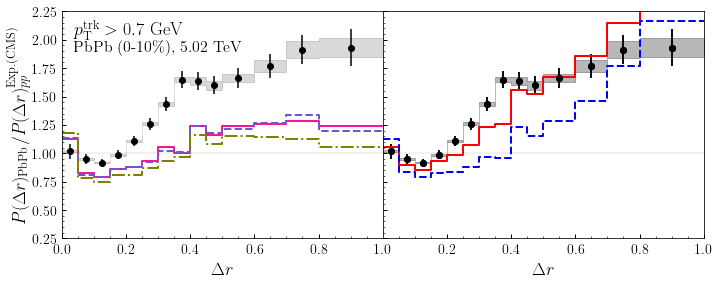

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
(ax1, ax2)  = axs

for ax in axs.flat:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\Delta r$', fontsize=18, labelpad=6)
    ax.set_xticks([0.2,0.4,0.6,0.8, 1.0])
    ax.tick_params(width = 1, length = 4, pad=5)
    ax.label_outer()
    ax.axhline(1, color = "black", linewidth=0.2, alpha=0.5)

ax1.text(0.035, 2.05, r'$p_{\mathrm{T}}^{\mathrm{trk}}>0.7$ GeV', fontsize = 18, ha = 'left')
# ax2.text(0.035, 2.05, r'$p_{\mathrm{T}}^{\mathrm{trk}}>2$ GeV', fontsize = 18, ha = 'left')
# ax3.text(0.035, 2.05, r'$p_{\mathrm{T}}^{\mathrm{trk}}>4$ GeV', fontsize = 18, ha = 'left')

ax1.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])
ax1.set_xlim(0,1.0)
ax2.set_xlim(0,1.0)
ax3.set_xlim(0,1.0)
ax1.set_ylim(0.25,2.25)
ax1.set_ylabel(r'$P(\Delta r)_{\mathrm{PbPb}}/P(\Delta r)_{pp}^{\mathrm{Exp.(CMS)}}$', fontsize=18, labelpad=2)




ax1.text(0.035, 1.9, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 16, ha = 'left')

file1 = '../SubStrData/JetShapeCMS5TeV/Type5_qhatA10_B0_0p30_Q2p0/OutputFile/jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt0.7-300.0_rap0.0-2.4.txt'
file2 = '../SubStrData/JetShapeCMS5TeV/Type5_qhatA10_B100_0p30_Q2p0/OutputFile/jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt0.7-300.0_rap0.0-2.4.txt'
file3 = '../SubStrData/JetShapeCMS5TeV/RunningAlphas_MATTER_Vacuum_LBT/5020_PbPb_0-10_0.35_2.0_1/jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt0.7-300.0_rap0.0-2.4.txt'

fileden = '/Users/yasukitachibana/GoogleDrive/Codes/AAPaperJetAnalysis/exp_data/cms_5tev_jet_shape/jet_shape_pp.txt'

filed = '/Users/yasukitachibana/GoogleDrive/Codes/AAPaperJetAnalysis/exp_data/cms_5tev_jet_shape/raa_jet_shape_0-10_0R7.txt'


data1 = np.loadtxt(file1, comments='#')
data2 = np.loadtxt(file2, comments='#')
data3 = np.loadtxt(file3, comments='#')
dataden = np.loadtxt(fileden, comments='#')
datad = np.loadtxt(filed, comments='#')

x1 = data1[:,1]
y1 = data1[:,3]
y1err = data1[:,4]
x1step = np.append(data1[:,0],data1[-1,2])
y1step = np.append(data1[:,3],data1[-1,3])

x2 = data2[:,1]
y2 = data2[:,3]
y2err = data2[:,4]
x2step = np.append(data2[:,0],data2[-1,2])
y2step = np.append(data2[:,3],data2[-1,3])

x3 = data3[:,1]
y3 = data3[:,3]
y3err = data2[:,4]
x3step = np.append(data3[:,0],data3[-1,2])
y3step = np.append(data3[:,3],data3[-1,3])



xden = dataden[:,0]
yden = dataden[:,3]
xdenstep = np.append(dataden[:,1],dataden[-1,2])
ydenstep = np.append(dataden[:,3],dataden[-1,3])

xd = datad[:,0]
yd = datad[:,3]
yderr = datad[:,4]
xdstep = np.append(datad[:,1],datad[-1,2])
ydstep = np.append(datad[:,3],datad[-1,3])

ydsysp = np.append(datad[:,6],datad[-1,6])
ydsysm = np.append(datad[:,7],datad[-1,7])



ax1.errorbar(xd, yd, yerr=yderr, marker="o", linestyle="none", color = 'black')
ax1.fill_between(xdstep, ydstep+ydsysm, ydstep+ydsysp, step='post', color='black', alpha=0.15)

ax1.step(x1step, y1step/ydenstep, where='post', label='MATTER+LBT'+'\n'+r'$c_1=10,c_2=0,\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.3$', color='deeppink',linewidth = 2)
#ax1.errorbar(x1, y1, yerr=y1err, marker="", linestyle="none", color='deeppink',linewidth = 2)

ax1.step(x2step, y2step/ydenstep, where='post', label='MATTER+LBT'+'\n'+r'$c_1=10,c_2=100,\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.3$', linestyle='dashed', color='slateblue',linewidth = 2)
#ax1.errorbar(x2, y2, yerr=y2err, marker="", linestyle="none", color='slateblue',linewidth = 2)

ax1.step(x3step, y3step/ydenstep, where='post', label='MATTER(vacuum)+LBT'+'\n'+r'$c_1=0,c_2=0,\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.35$', linestyle='dashdot', color='olive',linewidth = 2)
#ax1.errorbar(x3, y3, yerr=y3err, marker="", linestyle="none", color='olive',linewidth = 2)
#########################################################################################
file1 = '../SubStrData/JetShapeCMS5TeV/Tc_160_160/5020_PbPb_0-10_0R25_2R0_1/jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt0.7-300.0_rap0.0-2.4.txt'
file2 = '../SubStrData/JetShapeCMS5TeV/Tc_160_160/5020_PbPb_0-10_0R25_2R0_0/jetshape_hist_total_ptj120-5020_rapj0.0-1.6_pt0.7-300.0_rap0.0-2.4.txt'

fileden = '/Users/yasukitachibana/GoogleDrive/Codes/AAPaperJetAnalysis/exp_data/cms_5tev_jet_shape/jet_shape_pp.txt'

filed = '/Users/yasukitachibana/GoogleDrive/Codes/AAPaperJetAnalysis/exp_data/cms_5tev_jet_shape/raa_jet_shape_0-10_0R7.txt'


data1 = np.loadtxt(file1, comments='#')
data2 = np.loadtxt(file2, comments='#')
data3 = np.loadtxt(file3, comments='#')
dataden = np.loadtxt(fileden, comments='#')
datad = np.loadtxt(filed, comments='#')

x1 = data1[:,1]
y1 = data1[:,3]
y1err = data1[:,4]
x1step = np.append(data1[:,0],data1[-1,2])
y1step = np.append(data1[:,3],data1[-1,3])

x2 = data2[:,1]
y2 = data2[:,3]
y2err = data2[:,4]
x2step = np.append(data2[:,0],data2[-1,2])
y2step = np.append(data2[:,3],data2[-1,3])


xden = dataden[:,0]
yden = dataden[:,3]
xdenstep = np.append(dataden[:,1],dataden[-1,2])
ydenstep = np.append(dataden[:,3],dataden[-1,3])


xd = datad[:,0]
yd = datad[:,3]
yderr = datad[:,4]
xdstep = np.append(datad[:,1],datad[-1,2])
ydstep = np.append(datad[:,3],datad[-1,3])

ydsysp = np.append(datad[:,6],datad[-1,6])
ydsysm = np.append(datad[:,7],datad[-1,7])



ax2.errorbar(xd, yd, yerr=yderr, marker="o", linestyle="none", color = 'black')
ax2.fill_between(xdstep, ydstep+ydsysm, ydstep+ydsysp, step='post', color='black', alpha=0.15)


ax2.step(x1step, y1step/ydenstep, where='post', label='MATTER+LBT\n no running '+r'$\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.25$', color='red',linewidth = 2)
#ax2.errorbar(x1, y1, yerr=y1err, marker="", linestyle="none", color='red',linewidth = 2)

ax2.step(x2step, y2step/ydenstep, where='post', label='MATTER+LBT w/o recoils\n no running '+r'$\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.25$', linestyle='dashed', color='blue',linewidth = 2)
#ax2.errorbar(x2, y2, yerr=y2err, marker="", linestyle="none", color='blue',linewidth = 2)

ax2.errorbar(xd, yd, yerr=yderr, marker="o", linestyle="none", color = 'black',label='CMS [JHEP 1805, 006 (2018)]')
ax2.fill_between(xdstep, ydstep+ydsysm, ydstep+ydsysp, step='post', color='black', alpha=0.15)

#######

plt.tight_layout()
plt.savefig("jetshape_raa_divided_by_ppexp.pdf")